Question 1.

1.Simple Linear Regression (Y=β0+β1X+ϵ): models relationship between only one independent variable and one dependent variable using a linear equation. 
Y is the dependent (outcome) variable,
X is the independent (predictor) variable,
β0 is the intercept (the value of Y when X=0)
β1 is the slope (the rate of change in Y for each unit change in X),ϵ is the error term, capturing the difference between predicted and actual values.

Multiple Linear Regression(Y=β0+β1X+...+βnXn+ϵ): includes two or more independent variables. The benefit of multiple linear regression over simple linear regression is that can capture more complex relationships and account for multiple factors that can influence the dependent variable. It can also protentilly improve the accuracy of the predictions (outcome). 

2.Continuous variable as the indicator can model a proportial change in the dependent variable for each unit increase in the predictor. The slope coefficent is the change outcome for each one-unit change.

Binary indicator variable is used for categorical data with only two possible answers and takes values 0 or 1. In this case, the slope coefficent represents the differnece in the mean of the dependent variable between the two groups represented by 0 and 1. 

3.Adding an indicator variable alongside a continuous variable in Multiple Linear Regression creates two parallel lines with distinct intercepts for each group, while maintaining a shared slope for the continuous variable. This setup allows the model to capture differences in baseline levels (intercepts) between groups without assuming a single trend for all data points, unlike Simple Linear Regression. 

4.When an interaction term between a continuous variable and an indicator variable is added to a Multiple Linear Regression model, it allows the model to fit different slopes for the continuous variable across the groups defined by the indicator variable.

5.When a multiple linear regression model is based only on indicator variables from non-binary categorical variables, the nature of the data will impact the outcome by shifting the intercept rather than introducing a trend or slope. It utilizes binary indicator variables that are 1 if the obervation is true and 0 if the observation is not. The model requires one less than the number of categorical variables to be binary variables, which is because one of the variables will serve as the "baseline"  This model estimates a different mean outcome for each category without assuming any continuous relationship between them. 

Question 2.

1.To make predictions using these models, we plug in specific values for the TV and Online advertising spending variables and calculate the expected Sales outcome.

Prediction without interaction: sales = beta0 + beta1(TV) + beta2(Online)

To predict sales, substitute the spending amounts for TV and Online into the formula. This model assumes that the effect of TV and Online are independent and additive, so the outcome of sales is simply the sum og the individual effects. 

Prediction with interaction: sales = beta0 + beta1(TV) + beta2(Online) + beta3(TV x Online)

To predict sales, substitute the TV and Online values into the formula. This model assumes that TV and Online interact, meaning the effectiveness of one depends on the amount spent on the other. This allows for the combined affect that might be larger or smaller than just adding individual effects.

2.If, rather than considering two continuous predictor variables, we instead suppose the advertisement budgets are simply categorized as either "high" or "low":

Prediction without interaction:
sales = beta0 + beta1(TV_high) + beta2(Online_high)
where TV_high is 1 if TV spending is high and 0 if it's low, and similar for Online_high. This assumes that increasing the budget to high in one medium is independent of the other.

Prediction with interaction:
sales = beta0 + beta1(TV_high) + beta2(Online_high) + beta3(TV_high x Online_high) where TV_high x Online_high is 1 if both of them are high. This prediction is additive, meaning the spending staus independently adds to sales. 

Question 4. 

The R-squared value tells us how well the model explains the variability in the outcome variable. R-squared of 17.6% means that only 17.6% of the variance in the outcome is explained by the predictors, meaning there are many other factors influencing the outcome that are not in the model. 

The coefficents and their associated p-values provide information about the strength of each individual perdictor's effect on the outcome, holding other predictors constant. A large coefficent such as 10 shows that certain predictors has a larger impact on the outcome variable. 

When the p-values are low (typically less than 0.05), this suggests that there is statistically strong evidence against the null hypothesis of “no effect,” meaning these predictors are likely genuinely associated with changes in the outcome. Here, even if the overall R-squared is low, the individual predictors can still have significant effects on the outcome, as indicated by large, statistically significant coefficients.

These metrics are not in conflict. Instead, they provide a fuller picture: R-squared offers insight into the model’s overall explanatory power, while p-values and coefficients give us a deeper understanding of the significance and effect size of individual predictors within that model context.

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [11]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        21:38:35   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Question 5.

The code illustrates the process of creating, fitting, and evaluating two linear regression models. It compares in-sample and out-of-sample R-squared values to assess each model’s ability to generalize.
In-sample R-squared for model4 is likely higher due to its increased complexity, indicating it captures more variability in the training data.
Out-of-sample R-squared for model4 could be significantly lower than its in-sample R-squared if the model overfits, showing that it doesn’t generalize as well to unseen data.
By evaluating the models on separate test data, we see that a more complex model isn’t always better for predicting new data, highlighting the balance between underfitting and overfitting in regression modeling.

Question 6.

The model4_linear_form creates new predictor variables as the columns of the "design matrix" to predict the outcome variable model4_spec.endog by adding a new columns to the design matrix where each row is an observation and each column represents a predictor or interaction term. The multicollinearity in this "design matrix" contribues to the lack of "out of sample" generalization of predictions from model4_fit because it occurs when two or more predictor variables are highly correlated. Multicollinearity causes the model to "fit the noise" in the training data. This means the model may capture random fluctuations that are not true signals, resulting in large standard errors for the estimates. This high degree of multicollinearity leads to overfitting the training data and poor generalization. 

Question 7.

model5_linear_form is extended and developed from model3_fit and model4_fit: It indtroduces moderate complexity by adding categorical predictors which are expected to have meaningful effects on the outcome variable. By limiting interaction terms, model5 reduces multicollinearity issues from model4 and simpler additive effects are used with continuous perdictors and other relveant categorical variables.

model6_linear_form is extended and developed from model5_linear_form: Predictors from model5 are refined by focusing on only the statisticlly significant indicators. This removes noise from irrelevant categories and reduces risk of overfitting. Removing non-significant terms helps stabilize coefficents, since irrelevant predictors can increase standard errors and result in unreliable coefficents. 

model7_linear_form is extended and developed from model6_linear_form: Interactions among important continuous perdictors are introduced, limiting it to just the relevant set of variables rather than broad interactions. This control allows for capture of nonlinear relationships among important predictors without introducing excessive multicollinearity. 

Overall, through these refinements, each new model attempts to achieve a better balance between capturing meaningful predictor relationships and maintaining model generalizability.

Question 8.

The results demonstrate how well a model generalizes to unseen data. By comparing in-sample R-squared (performance on training data) and out-of-sample R-squared (performance on test data), we assess the model’s ability to predict accurately on new data. If in-sample R-squared is high but out-of-sample R-squared is low, it indicates overfitting—where the model performs well on training data but poorly on unseen data. The scatter plot helps visualize this relationship, and points near the line y=x suggest good generalization. This demonstration shows how the performance of models can vary across different data and emphasizes the importance of testing both training and test performance for model evaluation. 

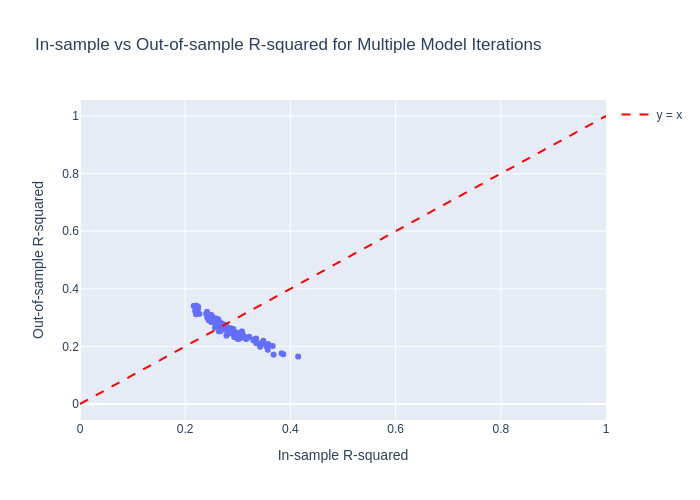

Average In-sample R-squared: 0.2884
Average Out-of-sample R-squared: 0.2583


In [19]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px

# Load the Pokemon data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

# Define the linear model formula
linear_form = 'HP ~ Attack + Defense + Speed + Legendary + Q("Sp. Def") + Q("Sp. Atk")'

# Set the number of repetitions (iterations)
reps = 100

# Initialize arrays to store in-sample and out-of-sample R-squared values
in_sample_Rsquared = np.array([0.0] * reps)
out_of_sample_Rsquared = np.array([0.0] * reps)

# Loop over the number of repetitions
for i in range(reps):
    # Randomly split the data into training and testing sets
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)  # 50% for training
    
    # Fit the model using the training data
    final_model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
    
    # In-sample R-squared (goodness of fit on the training data)
    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    # Out-of-sample R-squared (goodness of fit on the testing data)
    out_of_sample_Rsquared[i] = np.corrcoef(pokeaman_test.HP, 
                                            final_model_fit.predict(pokeaman_test))[0, 1] ** 2

# Create a DataFrame to hold the results
df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

# Visualize the results using Plotly (scatter plot with line y=x for reference)
fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                 y="Out of Sample Performance (Rsquared)",
                 labels={"In Sample Performance (Rsquared)": "In-sample R-squared",
                         "Out of Sample Performance (Rsquared)": "Out-of-sample R-squared"},
                 title="In-sample vs Out-of-sample R-squared for Multiple Model Iterations")

# Add a line y = x to the plot for reference
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name="y = x", line=dict(dash='dash', color='red')))

# Show the plot
fig.show(renderer = "png")

# Optional: Print the average in-sample and out-of-sample R-squared
print(f"Average In-sample R-squared: {np.mean(in_sample_Rsquared):.4f}")
print(f"Average Out-of-sample R-squared: {np.mean(out_of_sample_Rsquared):.4f}")


Question 9. 

The code generates a scatter plot with in-sample r-squared values on the x-axis and out-of-sample r-squared values on the y-axis. Each point on the scatter plot represents a specific iteration of the model's performance. The plot shows how well the model performs on the training data verses how well it generalizes to new, unseen data. There is also a line on the plot: y-x. It represents the scenario where the in-sample and out-of-sample r-squared are equal (the perfect agreement), so it serves as a reference to visually assess the difference between in-sample and out-of-sample performance. Points above this line indicate better performance on the test data (out-of-sample), while points below it suggest that the model is overfitting.

Chatgpt link: https://chatgpt.com/share/6736751e-7254-8007-9e15-1ff0e1be6030 and summary: In this conversation, we discussed various statistical modeling techniques using the Pokémon dataset. The key points included:

Modeling: We built multiple regression models to predict Pokémon attributes (e.g., HP) based on factors like attack, defense, speed, and generation.
Model Evaluation: We explored how to assess model performance using in-sample and out-of-sample R-squared values, which measure how well models explain variance in the data and generalize to unseen data.
Multicollinearity: We discussed how multicollinearity (correlation between predictors) can affect model predictions, especially when predictor variables are highly correlated.
Cross-Generation Prediction: We extended models trained on one generation to predict data from other generations, comparing their performance to assess how well the models generalize to new data.
Visualization: We used tools like Plotly to visualize model performance metrics.
Overall, the focus was on model building, evaluating generalization, and improving prediction accuracy using different approaches.